In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-marriage-dataset/World Marriage Dataset.csv


In [2]:
import pandas as pd

# Load the dataset
marriage_df = pd.read_csv('/kaggle/input/world-marriage-dataset/World Marriage Dataset.csv')

# Display the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(marriage_df.head())

print("\nColumn names in the dataset:")
print(marriage_df.columns)


First few rows of the dataset:
   Sr.No.      Country AgeGroup  Sex MaritalStatus DataProcess  \
0       1  Afghanistan  [15-19]  Man      Divorced      Survey   
1       2  Afghanistan  [20-24]  Man      Divorced      Survey   
2       3  Afghanistan  [25-29]  Man      Divorced      Survey   
3       4  Afghanistan  [30-34]  Man      Divorced      Survey   
4       5  Afghanistan  [35-39]  Man      Divorced      Survey   

   Data Collection (Start Year)  Data Collection (End Year)  \
0                          1972                        1974   
1                          1972                        1974   
2                          1972                        1974   
3                          1972                        1974   
4                          1972                        1974   

           Data Source  
0  National statistics  
1  National statistics  
2  National statistics  
3  National statistics  
4  National statistics  

Column names in the dataset:
Index(['Sr.No

In [3]:
# Check for missing values
missing_values = marriage_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Drop or fill missing values as appropriate
# For simplicity, we'll drop rows with missing values here
marriage_df_cleaned = marriage_df.dropna()

# Convert categorical columns to appropriate types
marriage_df_cleaned['Country'] = marriage_df_cleaned['Country'].astype('category')
marriage_df_cleaned['AgeGroup'] = marriage_df_cleaned['AgeGroup'].astype('category')
marriage_df_cleaned['Sex'] = marriage_df_cleaned['Sex'].astype('category')
marriage_df_cleaned['MaritalStatus'] = marriage_df_cleaned['MaritalStatus'].astype('category')
marriage_df_cleaned['DataProcess'] = marriage_df_cleaned['DataProcess'].astype('category')
marriage_df_cleaned['Data Source'] = marriage_df_cleaned['Data Source'].astype('category')

# Ensure 'Data Collection (Start Year)' and 'Data Collection (End Year)' are integers
marriage_df_cleaned['Data Collection (Start Year)'] = marriage_df_cleaned['Data Collection (Start Year)'].astype(int)
marriage_df_cleaned['Data Collection (End Year)'] = marriage_df_cleaned['Data Collection (End Year)'].astype(int)

# Display cleaned data info
print("\nCleaned data info:")
print(marriage_df_cleaned.info())



Missing values in each column:
Series([], dtype: int64)

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271604 entries, 0 to 271603
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Sr.No.                        271604 non-null  int64   
 1   Country                       271604 non-null  category
 2   AgeGroup                      271604 non-null  category
 3   Sex                           271604 non-null  category
 4   MaritalStatus                 271604 non-null  category
 5   DataProcess                   271604 non-null  category
 6   Data Collection (Start Year)  271604 non-null  int64   
 7   Data Collection (End Year)    271604 non-null  int64   
 8   Data Source                   271604 non-null  category
dtypes: category(6), int64(3)
memory usage: 8.0 MB
None


In [4]:
# Display statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(marriage_df_cleaned[['Data Collection (Start Year)', 'Data Collection (End Year)']].describe())

# Display the distribution of categorical variables
print("\nDistribution of categorical variables:")
for column in ['Country', 'AgeGroup', 'Sex', 'MaritalStatus', 'DataProcess', 'Data Source']:
    print(f"\nDistribution of {column}:")
    print(marriage_df_cleaned[column].value_counts())



Statistical summary of numerical columns:
       Data Collection (Start Year)  Data Collection (End Year)
count                 271604.000000               271604.000000
mean                    1996.961488                 1997.059097
std                       14.244590                   14.284136
min                     1954.000000                 1955.000000
25%                     1986.000000                 1986.000000
50%                     2000.000000                 2000.000000
75%                     2010.000000                 2010.000000
max                     2019.000000                 2019.000000

Distribution of categorical variables:

Distribution of Country:
Country
Norway                                       6585
Hungary                                      6110
Iceland                                      5823
Sweden                                       5700
Denmark                                      5581
                                             ... 
Sint Ma

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


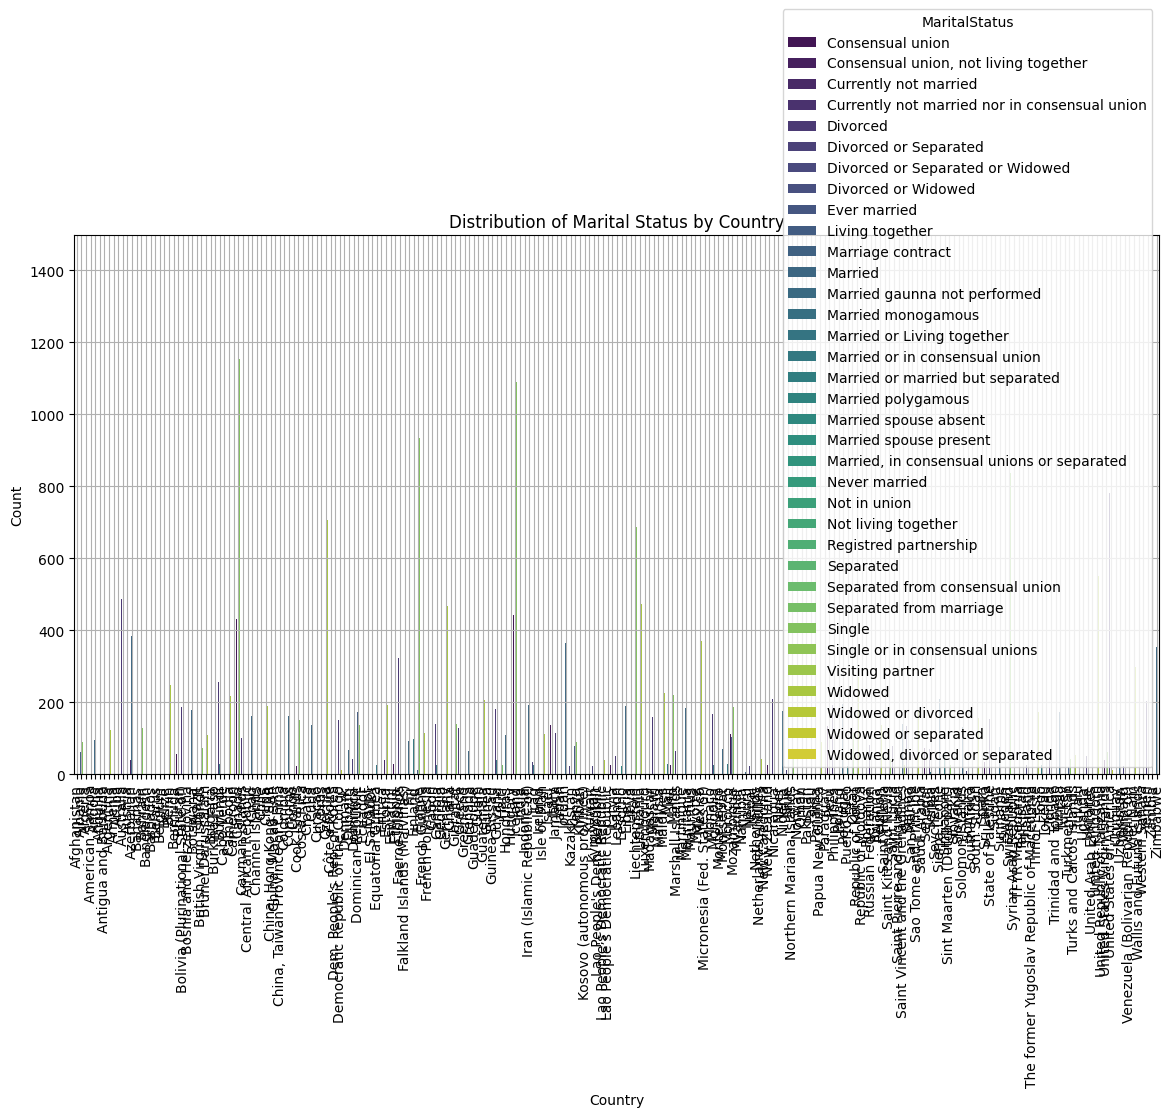

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of marital status by country
plt.figure(figsize=(14, 7))
sns.countplot(data=marriage_df_cleaned, x='Country', hue='MaritalStatus', palette='viridis')
plt.title('Distribution of Marital Status by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

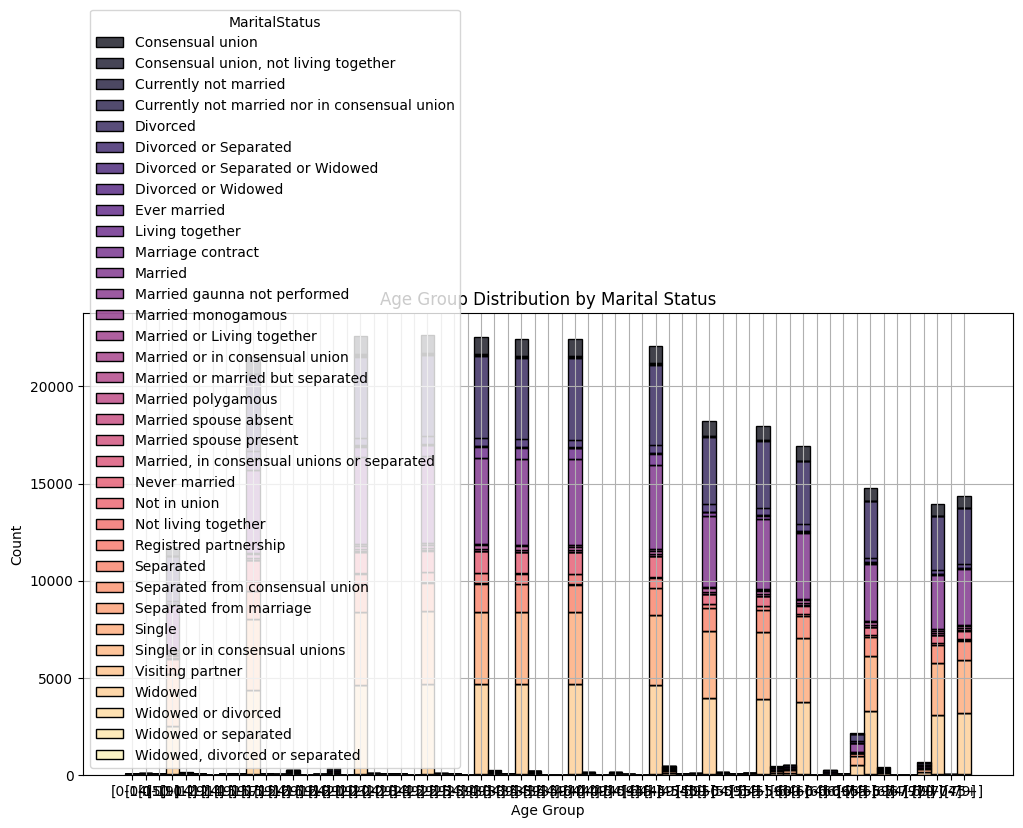

In [6]:
# Visualize the distribution of age by marital status
plt.figure(figsize=(12, 6))
sns.histplot(data=marriage_df_cleaned, x='AgeGroup', hue='MaritalStatus', multiple='stack', palette='magma', bins=30)
plt.title('Age Group Distribution by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

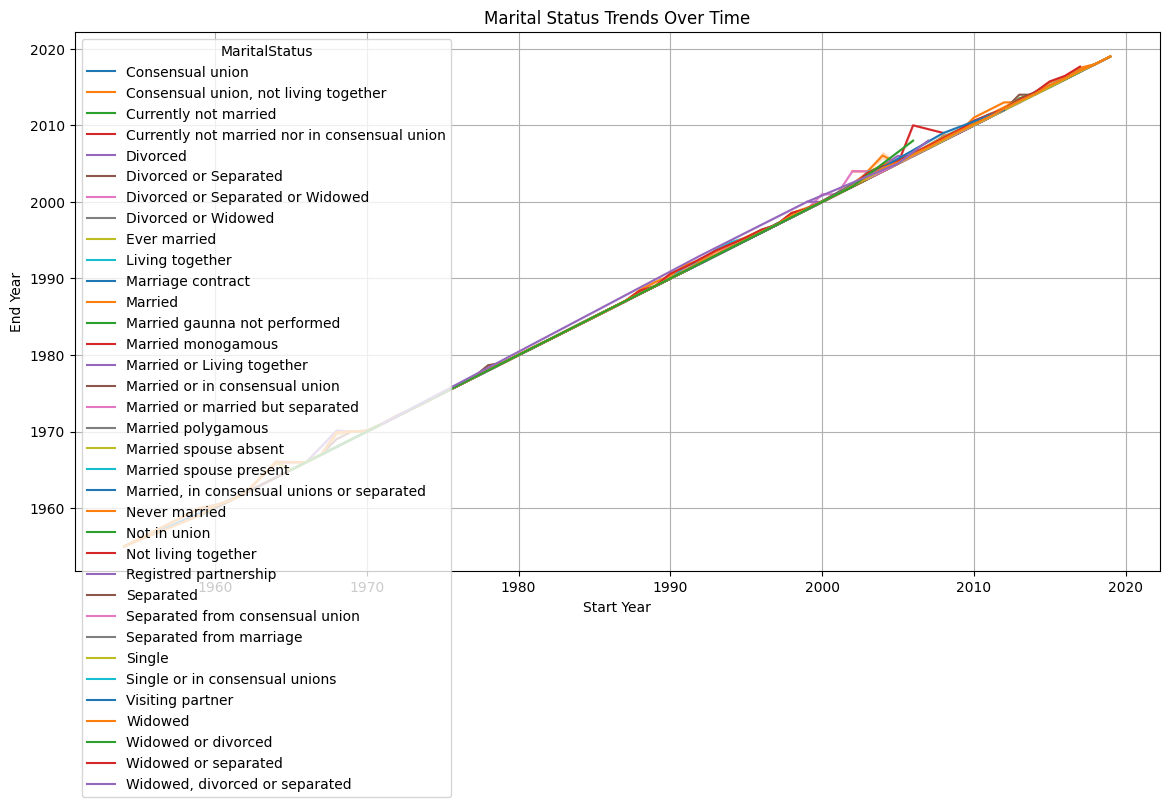

In [7]:
# Visualize trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=marriage_df_cleaned, x='Data Collection (Start Year)', y='Data Collection (End Year)', hue='MaritalStatus', palette='tab10')
plt.title('Marital Status Trends Over Time')
plt.xlabel('Start Year')
plt.ylabel('End Year')
plt.grid(True)
plt.show()


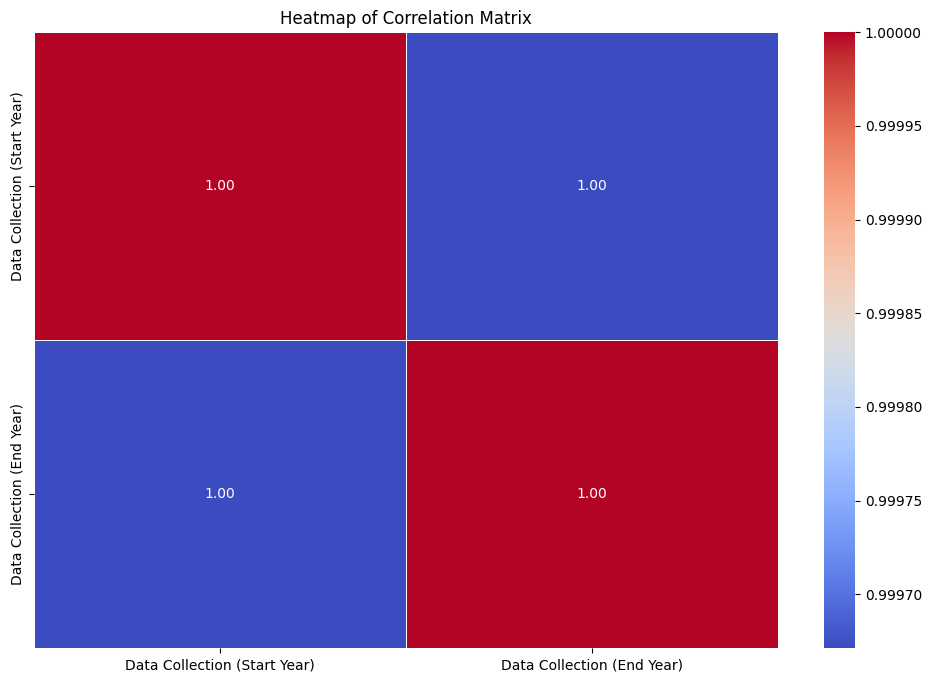

In [8]:
# Calculate correlation matrix for numerical columns
correlation_matrix = marriage_df_cleaned[['Data Collection (Start Year)', 'Data Collection (End Year)']].corr()

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

<Figure size 1200x1000 with 0 Axes>

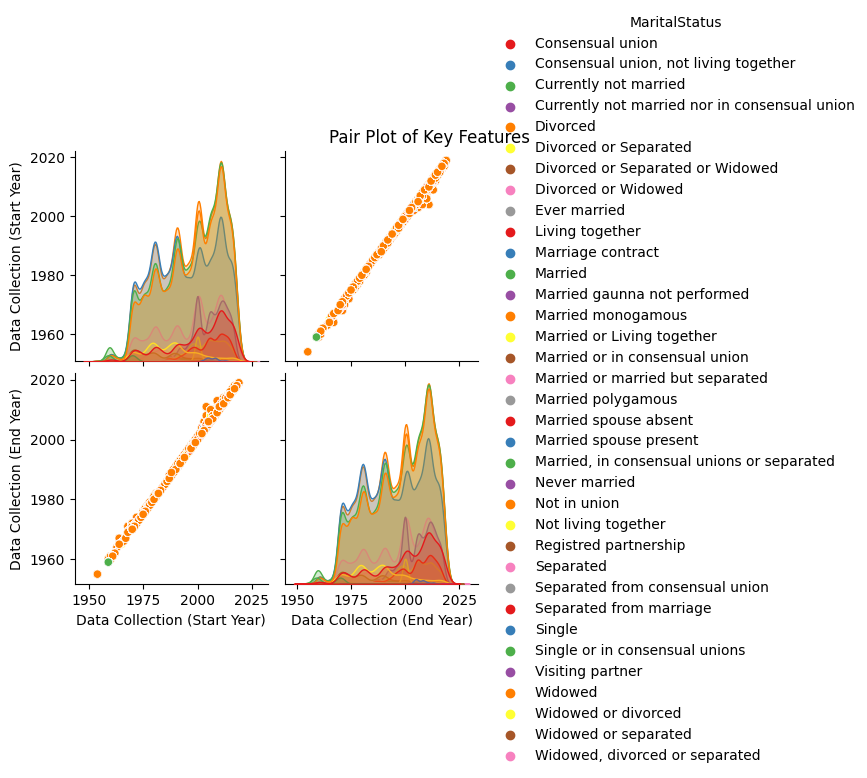

In [9]:
# Create a pair plot for numerical features and marital status
key_features = ['Data Collection (Start Year)', 'Data Collection (End Year)']

plt.figure(figsize=(12, 10))
sns.pairplot(marriage_df_cleaned[key_features + ['MaritalStatus']], hue='MaritalStatus', palette='Set1')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

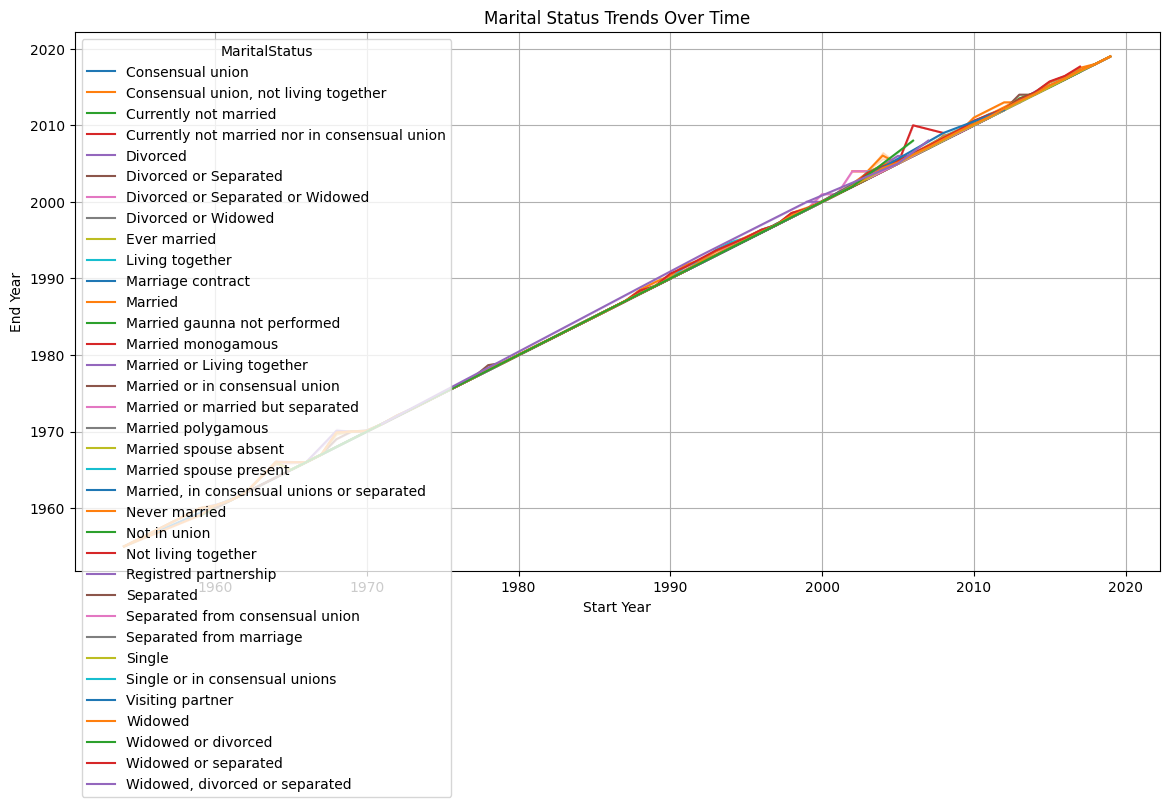

In [10]:
# Advanced trend analysis
if 'Data Collection (Start Year)' in marriage_df_cleaned.columns:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=marriage_df_cleaned, x='Data Collection (Start Year)', y='Data Collection (End Year)', hue='MaritalStatus', palette='tab10')
    plt.title('Marital Status Trends Over Time')
    plt.xlabel('Start Year')
    plt.ylabel('End Year')
    plt.grid(True)
    plt.show()
else:
    print("No time component found in the dataset.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

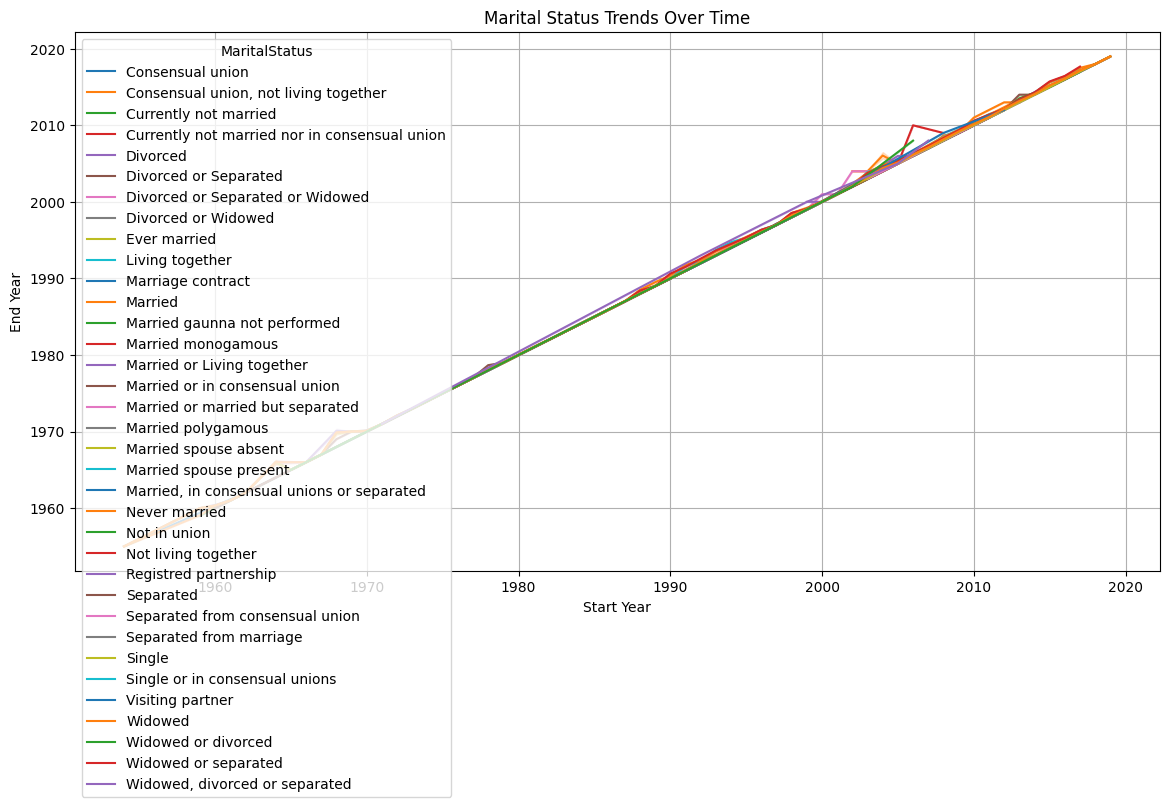

In [11]:
# Advanced trend analysis
if 'Data Collection (Start Year)' in marriage_df_cleaned.columns:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=marriage_df_cleaned, x='Data Collection (Start Year)', y='Data Collection (End Year)', hue='MaritalStatus', palette='tab10')
    plt.title('Marital Status Trends Over Time')
    plt.xlabel('Start Year')
    plt.ylabel('End Year')
    plt.grid(True)
    plt.show()
else:
    print("No time component found in the dataset.")


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


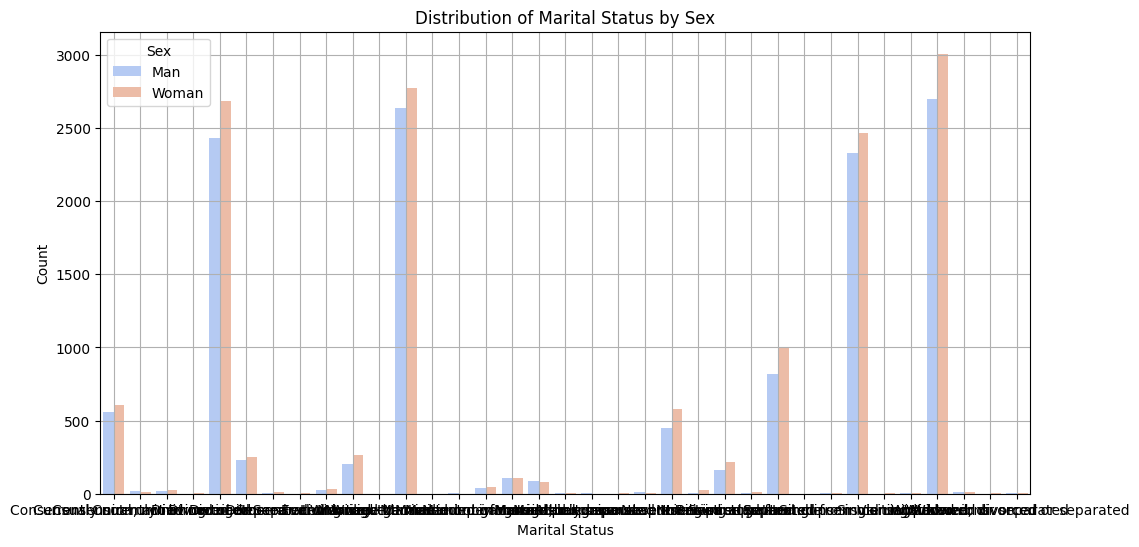

In [12]:
# Sample the data for visualization
sampled_df = marriage_df_cleaned.sample(frac=0.1, random_state=42)

# Visualize the distribution of marital status by sex
plt.figure(figsize=(12, 6))
sns.countplot(data=sampled_df, x='MaritalStatus', hue='Sex', palette='coolwarm')
plt.title('Distribution of Marital Status by Sex')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()
